In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/trab1/cursos-prouni.csv - cursos-prouni-2018-tratados.csv.csv',
                    )

In [5]:
df.head()

,grau,turno,mensalidade,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_id,curso_busca,cidade_busca,uf_busca,universidade_nome,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Bacharelado,Integral,9715.61,2.0,5.0,6.0,10.0,1002328574024,Medicina,Sao Paulo,SP,Universidade Cidade de São Paulo - UNICID,Medicina,739.62,738.08,738.96,718.64
1,Bacharelado,Integral,9674.34,4.0,1.0,5.0,2.0,65899611932754,Medicina,Rio Branco,AC,Faculdade Barão do Rio Branco - FAB,Medicina,758.32,723.94,734.92,711.26
2,Bacharelado,Integral,9023.07,4.0,4.0,5.0,5.0,65921511844324,Medicina,Itaperuna,RJ,Faculdade Redentor - FACREDENTOR,Medicina,741.06,729.02,730.98,722.82
3,Bacharelado,Integral,8508.54,2.0,1.0,7.0,2.0,104123711716094,Medicina,Belem,PA,Faculdade Metropolitana da Amazônia - FAMAZ,Medicina,741.36,739.90,760.80,715.10
4,Bacharelado,Integral,8281.38,3.0,1.0,6.0,2.0,105887911921884,Medicina,Imperatriz,MA,Universidade do Ceuma - Uniceuma - UNICEUMA,Medicina,756.46,737.88,747.14,717.60


In [6]:
list_drop_columns = ['grau',
                     'turno',
                     'nome',
                     'curso_id',
                     'nota_parcial_ampla',
                     'nota_parcial_cotas',
                     'nota_integral_ampla',
                     'nota_integral_cotas',
                     'mensalidade',
                     'cidade_busca',
                     'uf_busca',
                    'universidade_nome',
                     ]

df_aux = df.drop(columns=list_drop_columns)
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bolsa_integral_cotas  2203 non-null   float64
 1   bolsa_integral_ampla  2203 non-null   float64
 2   bolsa_parcial_cotas   2203 non-null   float64
 3   bolsa_parcial_ampla   2203 non-null   float64
 4   curso_busca           2203 non-null   object 
dtypes: float64(4), object(1)
memory usage: 86.2+ KB


In [7]:
df_aux.head()

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_busca
0,2.0,5.0,6.0,10.0,Medicina
1,4.0,1.0,5.0,2.0,Medicina
2,4.0,4.0,5.0,5.0,Medicina
3,2.0,1.0,7.0,2.0,Medicina
4,3.0,1.0,6.0,2.0,Medicina


ATRIBUTOS:

curso_busca: qual curso está sendo ofertado

bolsa_integral_ampla: quantidade de bolsas da categoria de bolsa integral de ampla concorrência

bolsa_integral_cotas: quantidade de bolsas da categoria de bolsa integral com aplicação de cotas

bolsa_parcial_ampla: quantidade de bolsas da categoria de bolsa parcial de ampla concorrência

bolsa_parcial_cotas: quantidade de bolsas da categoria de bolsa parcial com aplicação de cotas

**Bolsa Integral Cotas**

In [9]:
import plotly.express as px

In [11]:
hist =  px.histogram (df_aux,  x = "bolsa_integral_cotas", nbins=60) 
hist.update_layout(width=600,height=400,title_text='Distribuição de Bolsas - Integral Cotas') 
hist.show()

**Bolsa Parcial Ampla**

In [12]:
df_aux['bolsa_parcial_ampla'].value_counts()

3.0      428
1.0      410
2.0      370
4.0      200
5.0      167
        ... 
39.0       1
72.0       1
37.0       1
27.0       1
112.0      1
Name: bolsa_parcial_ampla, Length: 70, dtype: int64

In [16]:
import seaborn as sns

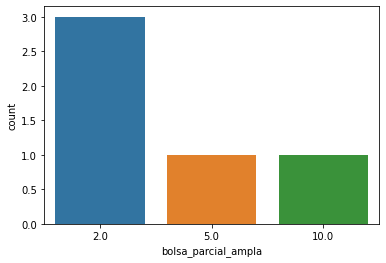

In [17]:
sns.countplot(x='bolsa_parcial_ampla', data=df_aux.head())

In [18]:
df_aux.shape

(2203, 5)

Exploração e tratamento de dados:

In [19]:
#mudando os nomes das colunas
df_aux.head(2)

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_busca
0,2.0,5.0,6.0,10.0,Medicina
1,4.0,1.0,5.0,2.0,Medicina


In [20]:
df_aux.rename(columns={'curso_busca': 'curso_ofertado'}, inplace=True)

In [21]:
df_aux.head(3)

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado
0,2.0,5.0,6.0,10.0,Medicina
1,4.0,1.0,5.0,2.0,Medicina
2,4.0,4.0,5.0,5.0,Medicina


Valores NaN

In [22]:
# RELAÇÃO DA QUANTIDADE
df_aux.isnull().sum()

bolsa_integral_cotas    0
bolsa_integral_ampla    0
bolsa_parcial_cotas     0
bolsa_parcial_ampla     0
curso_ofertado          0
dtype: int64

Tipos de atributos

In [23]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df_aux.dtypes

bolsa_integral_cotas    float64
bolsa_integral_ampla    float64
bolsa_parcial_cotas     float64
bolsa_parcial_ampla     float64
curso_ofertado           object
dtype: object

Dados estatísiticos

In [24]:
df_aux.describe()

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla
count,2203.000000,2203.000000,2203.000000,2203.000000
mean,1.891058,2.082161,3.387199,7.190649
std,1.969321,2.105756,4.020312,13.897084
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,2.000000,3.000000
75%,2.000000,2.000000,4.000000,6.000000
max,34.000000,50.000000,74.000000,179.000000


Outliers

In [25]:
import plotly.express as px

In [26]:
boxplot = px.box(df_aux, y="bolsa_integral_ampla")
boxplot.show()

In [27]:
boxplot = px.box(df_aux, y="bolsa_integral_cotas")
boxplot.show()

In [28]:
boxplot = px.box(df_aux, y="bolsa_parcial_ampla")
boxplot.show()

In [29]:
boxplot = px.box(df_aux, y="bolsa_parcial_cotas")
boxplot.show()

Pré-processamento

In [30]:
df_aux.head(2)

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado
0,2.0,5.0,6.0,10.0,Medicina
1,4.0,1.0,5.0,2.0,Medicina


In [31]:
#excluindo cursos ofertados

df2 = df_aux.drop(labels = 'curso_ofertado', axis = 1)

In [32]:
df2.head(2)

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla
0,2.0,5.0,6.0,10.0
1,4.0,1.0,5.0,2.0


Escalonamento

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
escala = StandardScaler()

In [35]:
df2_esc = escala.fit_transform(df2)

In [36]:
df2_esc

array([[ 0.05533231,  1.38596374,  0.65004759,  0.20219988],
       [ 1.07114123, -0.51402264,  0.40125419, -0.37359115],
       [ 1.07114123,  0.91096714,  0.40125419, -0.15766952],
       ...,
       [-0.45257216, -0.51402264, -0.59391944, -0.30161727],
       [-0.45257216, -0.03902605, -0.59391944,  0.130226  ],
       [-0.45257216, -0.03902605, -0.34512603, -0.15766952]])

K Means com 2 atributos

In [37]:
df2

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla
0,2.0,5.0,6.0,10.0
1,4.0,1.0,5.0,2.0
2,4.0,4.0,5.0,5.0
3,2.0,1.0,7.0,2.0
4,3.0,1.0,6.0,2.0
...,...,...,...,...
2198,1.0,2.0,1.0,3.0
2199,1.0,1.0,1.0,3.0
2200,1.0,1.0,1.0,3.0
2201,1.0,2.0,1.0,9.0


In [38]:
dados = df2.iloc[:, [2,3]].values

In [39]:
dados

array([[ 6., 10.],
       [ 5.,  2.],
       [ 5.,  5.],
       ...,
       [ 1.,  3.],
       [ 1.,  9.],
       [ 2.,  5.]])

Elbow Method

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

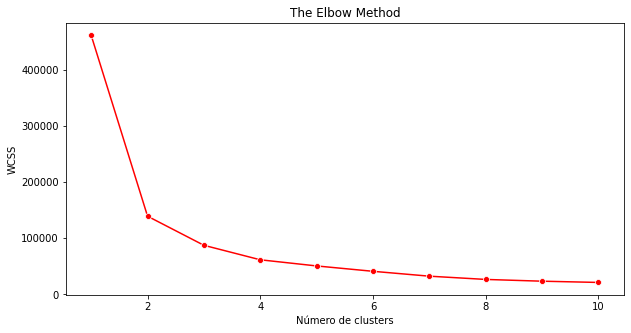

In [42]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

Agrupamento

In [43]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 5, max_iter = 300)

In [44]:
kmeans1 = kmeans.fit(dados)

In [45]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[ 2.77343332,  3.2929834 ],
       [ 5.06060606, 92.75757576],
       [ 4.06329114, 45.25316456],
       [ 8.01785714, 13.64732143]])

In [46]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([3, 0, 0, ..., 0, 0, 0], dtype=int32)

In [47]:
dados[2,:]

array([5., 5.])

In [48]:
classificacao[3]

0

In [49]:
import plotly.express as px
import plotly.graph_objects as go

In [50]:
graf1 = px.scatter(x = dados[:,0], y = dados[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15, 15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'bolsa_integral_ampla')
graf3.update_yaxes(title = 'bolsa_parcial_cotas')
graf3.show()

In [51]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,3
1,0
2,0
3,0
4,0
...,...
2198,0
2199,0
2200,0
2201,0


In [52]:
df3 = pd.concat([df_aux, agrupamento],axis=1)
df3

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado,Grupo
0,2.0,5.0,6.0,10.0,Medicina,3
1,4.0,1.0,5.0,2.0,Medicina,0
2,4.0,4.0,5.0,5.0,Medicina,0
3,2.0,1.0,7.0,2.0,Medicina,0
4,3.0,1.0,6.0,2.0,Medicina,0
...,...,...,...,...,...,...
2198,1.0,2.0,1.0,3.0,Teologia,0
2199,1.0,1.0,1.0,3.0,Teologia,0
2200,1.0,1.0,1.0,3.0,Pedagogia,0
2201,1.0,2.0,1.0,9.0,Gestão da Qualidade,0


In [53]:
df3.iloc[150 , :]

bolsa_integral_cotas                 2.0
bolsa_integral_ampla                 4.0
bolsa_parcial_cotas                  3.0
bolsa_parcial_ampla                  8.0
curso_ofertado          Engenharia Civil
Grupo                                  0
Name: 150, dtype: object

In [55]:
df3.loc[df3.curso_ofertado == 'Enfermagem'] 

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado,Grupo
54,1.0,1.0,2.0,2.0,Enfermagem,0
55,2.0,1.0,2.0,1.0,Enfermagem,0
80,1.0,1.0,2.0,22.0,Enfermagem,3
134,1.0,1.0,2.0,1.0,Enfermagem,0
135,2.0,1.0,4.0,3.0,Enfermagem,0
...,...,...,...,...,...,...
1364,2.0,1.0,2.0,5.0,Enfermagem,0
1375,2.0,3.0,4.0,8.0,Enfermagem,0
1380,5.0,8.0,9.0,16.0,Enfermagem,3
1425,1.0,3.0,3.0,5.0,Enfermagem,0


In [56]:
grupo0 = df3.loc[df3.Grupo == 0]
grupo0 

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado,Grupo
1,4.0,1.0,5.0,2.0,Medicina,0
2,4.0,4.0,5.0,5.0,Medicina,0
3,2.0,1.0,7.0,2.0,Medicina,0
4,3.0,1.0,6.0,2.0,Medicina,0
5,4.0,1.0,8.0,2.0,Medicina,0
...,...,...,...,...,...,...
2198,1.0,2.0,1.0,3.0,Teologia,0
2199,1.0,1.0,1.0,3.0,Teologia,0
2200,1.0,1.0,1.0,3.0,Pedagogia,0
2201,1.0,2.0,1.0,9.0,Gestão da Qualidade,0


In [57]:
grupo0.shape

(1867, 6)

In [58]:
grupo1 = df3.loc[df3.Grupo == 1]
grupo1

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado,Grupo
177,2.0,1.0,1.0,72.0,Engenharia de Produção,1
180,15.0,4.0,5.0,95.0,Direito,1
181,5.0,1.0,2.0,70.0,Direito,1
182,7.0,2.0,5.0,96.0,Direito,1
325,1.0,1.0,2.0,96.0,Psicologia,1
326,1.0,1.0,2.0,96.0,Psicologia,1
411,1.0,1.0,1.0,101.0,Educação Física,1
599,1.0,3.0,4.0,92.0,Sistemas de Informação,1
600,2.0,4.0,6.0,108.0,Análise e Desenvolvimento de Sistemas,1
694,1.0,1.0,2.0,87.0,Administração,1


In [59]:
grupo1.shape

(33, 6)

In [60]:
#K Means com todos os atributos
df2_esc

array([[ 0.05533231,  1.38596374,  0.65004759,  0.20219988],
       [ 1.07114123, -0.51402264,  0.40125419, -0.37359115],
       [ 1.07114123,  0.91096714,  0.40125419, -0.15766952],
       ...,
       [-0.45257216, -0.51402264, -0.59391944, -0.30161727],
       [-0.45257216, -0.03902605, -0.59391944,  0.130226  ],
       [-0.45257216, -0.03902605, -0.34512603, -0.15766952]])

In [61]:
df2_esc.shape

(2203, 4)

In [62]:
#Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

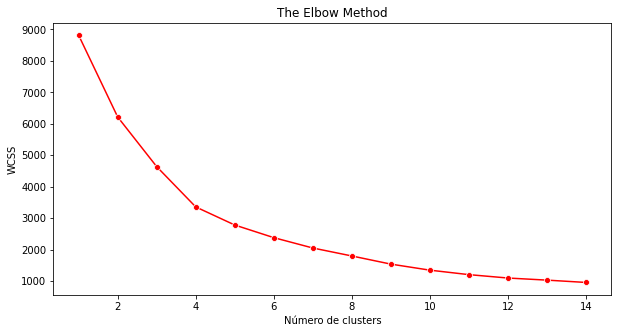

In [64]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 15), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

Agrupamento

In [65]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 5, max_iter = 300)

In [66]:
kmeans2 = kmeans.fit(df2_esc)

In [67]:
#coordenadas dos centróides
centroides = kmeans2.cluster_centers_
centroides

array([[-2.85127300e-01, -3.96819919e-01, -2.65150634e-01,
        -2.77494432e-01],
       [ 3.16495147e+00,  3.01452349e+00,  3.16844616e+00,
         6.45793996e-01],
       [ 1.36212817e+00,  2.43003180e-01,  1.27462271e+00,
        -8.45710440e-02],
       [-6.86007678e-03, -3.34687194e-01, -1.24258417e-01,
         3.96026459e+00],
       [ 1.32608484e+01,  9.34215670e+00,  1.35251064e+01,
         2.88322689e+00],
       [-1.32123705e-01,  9.47687577e-01, -1.37281167e-01,
        -2.53883453e-02]])

In [68]:
#inversão do escalonamento
escala.inverse_transform(kmeans2.cluster_centers_)

array([[ 1.32967786,  1.24674435,  2.32145305,  3.33516107],
       [ 8.12244898,  8.42857143, 16.12244898, 16.16326531],
       [ 4.57291667,  2.59375   ,  8.51041667,  6.015625  ],
       [ 1.87755102,  1.37755102,  2.8877551 , 62.21428571],
       [28.        , 21.75      , 57.75      , 47.25      ],
       [ 1.63092269,  4.07730673,  2.83541147,  6.83790524]])

In [69]:
#classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([5, 2, 2, ..., 0, 0, 0], dtype=int32)

In [70]:
classificacao2[199]

0

In [71]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo'])
agrupamento2

,Grupo
0,5
1,2
2,2
3,0
4,0
...,...
2198,0
2199,0
2200,0
2201,0


In [72]:
df4 = pd.concat([df_aux, agrupamento2],axis=1)
df4

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado,Grupo
0,2.0,5.0,6.0,10.0,Medicina,5
1,4.0,1.0,5.0,2.0,Medicina,2
2,4.0,4.0,5.0,5.0,Medicina,2
3,2.0,1.0,7.0,2.0,Medicina,0
4,3.0,1.0,6.0,2.0,Medicina,0
...,...,...,...,...,...,...
2198,1.0,2.0,1.0,3.0,Teologia,0
2199,1.0,1.0,1.0,3.0,Teologia,0
2200,1.0,1.0,1.0,3.0,Pedagogia,0
2201,1.0,2.0,1.0,9.0,Gestão da Qualidade,0


In [73]:
df4.iloc[125 , :]

bolsa_integral_cotas                        1.0
bolsa_integral_ampla                        4.0
bolsa_parcial_cotas                         1.0
bolsa_parcial_ampla                         3.0
curso_ofertado          Arquitetura e Urbanismo
Grupo                                         5
Name: 125, dtype: object

In [75]:
df4.loc[df4.curso_ofertado == 'Psicologia'] 

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado,Grupo
87,2.0,1.0,1.0,1.0,Psicologia,0
101,1.0,1.0,1.0,2.0,Psicologia,0
102,1.0,1.0,1.0,1.0,Psicologia,0
138,2.0,1.0,3.0,1.0,Psicologia,0
139,1.0,1.0,1.0,2.0,Psicologia,0
...,...,...,...,...,...,...
1074,1.0,1.0,3.0,1.0,Psicologia,0
1119,1.0,1.0,2.0,1.0,Psicologia,0
1190,2.0,3.0,3.0,6.0,Psicologia,5
1209,1.0,1.0,2.0,1.0,Psicologia,0


In [76]:
grupo0 = df4.loc[df4.Grupo == 0]
grupo0 

,bolsa_integral_cotas,bolsa_integral_ampla,bolsa_parcial_cotas,bolsa_parcial_ampla,curso_ofertado,Grupo
3,2.0,1.0,7.0,2.0,Medicina,0
4,3.0,1.0,6.0,2.0,Medicina,0
7,1.0,1.0,4.0,3.0,Medicina,0
8,1.0,1.0,1.0,3.0,Medicina,0
11,1.0,1.0,1.0,1.0,Medicina,0
...,...,...,...,...,...,...
2198,1.0,2.0,1.0,3.0,Teologia,0
2199,1.0,1.0,1.0,3.0,Teologia,0
2200,1.0,1.0,1.0,3.0,Pedagogia,0
2201,1.0,2.0,1.0,9.0,Gestão da Qualidade,0


In [77]:
grupo0.shape

(1459, 6)